######Required Dependencies

In [ ]:
# Importing Dependencies

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
# Importing Data

data = pd.read_csv('/content/Bondora_20.csv')
data.shape

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (34,80,90) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


(34722, 112)

######Checking for Null Values and Data Pre-Processing

In [ ]:
round(data.isnull().sum()/len(data.index), 2)*100

ReportAsOfEOD                           0.0
LoanId                                  0.0
LoanNumber                              0.0
ListedOnUTC                             0.0
BiddingStartedOn                        0.0
                                       ... 
NrOfScheduledPayments                  48.0
ReScheduledOn                          74.0
PrincipalDebtServicingCost              0.0
InterestAndPenaltyDebtServicingCost     0.0
ActiveLateLastPaymentCategory          46.0
Length: 112, dtype: float64

######Setting the 40 Percent Threshold for Null Values

In [ ]:
missing_columns = data.columns[100*(data.isnull().sum()/len(data.index)) > 40]
print(missing_columns)

Index(['CurrentDebtDaysPrimary', 'DebtOccuredOn', 'CurrentDebtDaysSecondary',
       'DebtOccuredOnForSecondary', 'DefaultDate',
       'PlannedPrincipalPostDefault', 'PlannedInterestPostDefault', 'EAD1',
       'EAD2', 'PrincipalRecovery', 'InterestRecovery', 'RecoveryStage',
       'EL_V0', 'Rating_V0', 'EL_V1', 'Rating_V1', 'Rating_V2',
       'ActiveLateCategory', 'CreditScoreEsMicroL', 'CreditScoreEsEquifaxRisk',
       'CreditScoreFiAsiakasTietoRiskGrade', 'CreditScoreEeMini',
       'GracePeriodStart', 'GracePeriodEnd', 'NextPaymentDate',
       'NextPaymentNr', 'NrOfScheduledPayments', 'ReScheduledOn',
       'ActiveLateLastPaymentCategory'],
      dtype='object')


In [ ]:
miss_cols = ['ContractEndDate', 'VerificationType', 'MonthlyPayment',
       'City', 'NrOfDependants',
       'EmploymentPosition', 'WorkExperience', 'OccupationArea',
       'HomeOwnershipType', 'DebtToIncome', 'FreeCash', 'LastPaymentOn',
       'CurrentDebtDaysPrimary', 'DebtOccuredOn', 'CurrentDebtDaysSecondary',
       'DebtOccuredOnForSecondary', 'ExpectedLoss', 'LossGivenDefault',
       'ExpectedReturn', 'ProbabilityOfDefault',
       'PrincipalOverdueBySchedule', 'PlannedPrincipalPostDefault',
       'PlannedInterestPostDefault', 'EAD1', 'EAD2', 'PrincipalRecovery',
       'InterestRecovery', 'RecoveryStage', 'StageActiveSince', 'ModelVersion',
       'Rating', 'EL_V0', 'Rating_V0', 'EL_V1', 'Rating_V1', 'Rating_V2',
       'ActiveLateCategory', 'WorseLateCategory', 'CreditScoreEsMicroL',
       'CreditScoreEsEquifaxRisk', 'CreditScoreFiAsiakasTietoRiskGrade',
       'CreditScoreEeMini', 'GracePeriodStart', 'GracePeriodEnd',
       'NextPaymentDate', 'NextPaymentNr', 'NrOfScheduledPayments',
       'ReScheduledOn', 'ActiveLateLastPaymentCategory']

In [ ]:
data.drop(miss_cols, axis = 1, inplace = True)
data.shape

(34722, 63)

In [ ]:
data.head(5)

,ReportAsOfEOD,LoanId,LoanNumber,ListedOnUTC,BiddingStartedOn,BidsPortfolioManager,BidsApi,BidsManual,UserName,NewCreditCustomer,...,InterestAndPenaltyWriteOffs,PrincipalBalance,InterestAndPenaltyBalance,NoOfPreviousLoansBeforeLoan,AmountOfPreviousLoansBeforeLoan,PreviousRepaymentsBeforeLoan,PreviousEarlyRepaymentsBefoleLoan,PreviousEarlyRepaymentsCountBeforeLoan,PrincipalDebtServicingCost,InterestAndPenaltyDebtServicingCost
0,27-01-2020,F0660C80-83F3-4A97-8DA0-9C250112D6EC,659,11-06-2009 16:40,11-06-2009 16:40,0,0,115.0410,KARU,True,...,0.0,0.00,0.00,1,83.0852,0.0000,0.0,0,0.0,0.0
1,27-01-2020,978BB85B-1C69-4D51-8447-9C240104A3A2,654,10-06-2009 15:48,10-06-2009 15:48,0,0,140.6057,koort681,False,...,0.0,0.00,0.00,2,255.6467,258.6256,0.0,0,0.0,0.0
2,27-01-2020,EA44027E-7FA7-4BB2-846D-9C1F013C8A22,641,05-06-2009 19:12,05-06-2009 19:12,0,0,319.5580,0ie,True,...,0.0,116.35,414.07,0,0.0000,0.0000,0.0,0,0.0,0.0
3,27-01-2020,CE67AD25-2951-4BEE-96BD-9C2700C61EF4,668,13-06-2009 12:01,13-06-2009 12:01,0,0,57.5205,Alyona,True,...,0.0,0.00,0.00,1,134.2144,0.0000,0.0,0,0.0,0.0
4,27-01-2020,9408BF8C-B159-4D6A-9D61-9C2400A986E3,652,10-06-2009 10:17,10-06-2009 10:17,0,0,319.5582,Kai,True,...,2.4,0.00,0.00,1,146.9966,0.0000,0.0,0,0.0,0.0


######Now, I Came Up With 62 Features 

######Deleting the Features Which are Duplicate to Each Other and Which are Totally Related to Date and Timeline

In [ ]:
cols_del = ['ReportAsOfEOD' , 'LoanId', 'UserName', 'LoanDate', 'FirstPaymentDate', 'MaturityDate_Original', 'MaturityDate_Last', 'Country', 'AppliedAmount',
            'IncomeFromPrincipalEmployer', 'IncomeFromPension' , 'IncomeFromFamilyAllowance',
            'IncomeFromSocialWelfare' , 'IncomeFromLeavePay', 'IncomeFromChildSupport', 'IncomeOther', 
            'MonthlyPaymentDay', 'ActiveScheduleFirstPaymentReached', 'PlannedInterestTillDate', 'PrincipalPaymentsMade', 'InterestAndPenaltyPaymentsMade', 
            'PrincipalBalance', 'InterestAndPenaltyBalance', 'PlannedPrincipalTillDate', 'PrincipalWriteOffs', 'InterestAndPenaltyWriteOffs', 'PreviousEarlyRepaymentsBefoleLoan']

In [ ]:
data.drop(cols_del, axis = 1, inplace = True)
data.shape

(34722, 36)

######Listing Out and Analyzing the Features Which are in the Form of Object Data Type; Those are not Important for Finance and Loan Modelling

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34722 entries, 0 to 34721
Data columns (total 36 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   LoanNumber                              34722 non-null  int64  
 1   ListedOnUTC                             34722 non-null  object 
 2   BiddingStartedOn                        34722 non-null  object 
 3   BidsPortfolioManager                    34722 non-null  int64  
 4   BidsApi                                 34722 non-null  int64  
 5   BidsManual                              34722 non-null  float64
 6   NewCreditCustomer                       34722 non-null  bool   
 7   LoanApplicationStartedDate              34722 non-null  object 
 8   ApplicationSignedHour                   34722 non-null  int64  
 9   ApplicationSignedWeekday                34722 non-null  int64  
 10  LanguageCode                            34722 non-null  in

In [ ]:
extras = ['ListedOnUTC',
'BiddingStartedOn',                 
'BidsPortfolioManager',                    
'BidsApi',                                 
'BidsManual',
'LoanApplicationStartedDate',               
'ApplicationSignedHour',                   
'ApplicationSignedWeekday',              
'LanguageCode',
'DateOfBirth',
'Unnamed: 29',]

len(extras)

11

In [ ]:
data.drop(extras, axis = 1, inplace = True)

data.shape

(34722, 25)

######DefaultDate is the Most Significant Feature as This Represents our Target Variable; If any Date is Available that means Person has Default by Bank otherwise Not

In [ ]:
data['DefaultDate']

0               NaN
1               NaN
2        16-07-2012
3               NaN
4        28-09-2009
            ...    
34717           NaN
34718    05-06-2018
34719           NaN
34720    20-03-2018
34721    17-08-2018
Name: DefaultDate, Length: 34722, dtype: object

In [ ]:
data['DefaultDate'].isnull().sum()

15702

In [ ]:
data['DefaultDate'].dtype

dtype('O')

In [ ]:
# Collection Indexes for the Valid Default Dates

late_payers = data.loc[pd.isna(data['DefaultDate']), :].index

In [ ]:
late_payers

Int64Index([    0,     1,     3,     9,    11,    12,    13,    18,    20,
               22,
            ...
            34689, 34691, 34695, 34698, 34699, 34700, 34709, 34710, 34717,
            34719],
           dtype='int64', length=15702)

######Creating New Target Variable or Feature and Encoding in Boolean According to DefaultDate

In [ ]:
li = []

for i in range(0, 34722):  #17933
  if i in late_payers:
    li.append(1)
  else:
    li.append(0)

len(li)

34722

In [ ]:
li = pd.DataFrame({'Target' : li})
li

,Target
0,1
1,1
2,0
3,1
4,0
...,...
34717,1
34718,0
34719,1
34720,0


In [ ]:
# Grouped our Processed Data and Target Feature

frames = [data, li]
  
data = pd.concat(frames, axis=1, join='inner')
display(data)

,LoanNumber,NewCreditCustomer,Age,Gender,Amount,Interest,LoanDuration,UseOfLoan,Education,MaritalStatus,...,DefaultDate,Status,Restructured,NoOfPreviousLoansBeforeLoan,AmountOfPreviousLoansBeforeLoan,PreviousRepaymentsBeforeLoan,PreviousEarlyRepaymentsCountBeforeLoan,PrincipalDebtServicingCost,InterestAndPenaltyDebtServicingCost,Target
0,659,True,61,1.0,115.0408,30.00,12,7,3.0,1.0,...,NaN,Repaid,False,1,83.0852,0.0000,0,0.0,0.0,1
1,654,False,48,1.0,140.6057,25.00,1,7,5.0,4.0,...,NaN,Repaid,False,2,255.6467,258.6256,0,0.0,0.0,1
2,641,True,58,1.0,319.5409,25.00,20,2,4.0,1.0,...,16-07-2012,Late,True,0,0.0000,0.0000,0,0.0,0.0,0
3,668,True,23,1.0,57.5205,45.00,15,0,2.0,3.0,...,NaN,Repaid,False,1,134.2144,0.0000,0,0.0,0.0,1
4,652,True,25,1.0,319.5436,30.00,12,6,4.0,2.0,...,28-09-2009,Repaid,False,1,146.9966,0.0000,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34717,719292,True,60,0.0,530.0000,22.33,60,-1,5.0,-1.0,...,NaN,Current,False,0,0.0000,0.0000,0,0.0,0.0,1
34718,719219,True,62,0.0,3185.0000,48.90,36,-1,4.0,-1.0,...,05-06-2018,Late,False,0,0.0000,0.0000,0,0.0,0.0,0
34719,719319,True,28,0.0,1590.0000,33.70,36,-1,4.0,-1.0,...,NaN,Repaid,False,0,0.0000,0.0000,0,0.0,0.0,1
34720,719268,True,50,0.0,530.0000,11.18,36,-1,3.0,-1.0,...,20-03-2018,Late,False,0,0.0000,0.0000,0,0.0,0.0,0


In [ ]:
data.drop('DefaultDate', axis = 1, inplace = True)

data.head(5)

,LoanNumber,NewCreditCustomer,Age,Gender,Amount,Interest,LoanDuration,UseOfLoan,Education,MaritalStatus,...,RefinanceLiabilities,Status,Restructured,NoOfPreviousLoansBeforeLoan,AmountOfPreviousLoansBeforeLoan,PreviousRepaymentsBeforeLoan,PreviousEarlyRepaymentsCountBeforeLoan,PrincipalDebtServicingCost,InterestAndPenaltyDebtServicingCost,Target
0,659,True,61,1.0,115.0408,30.0,12,7,3.0,1.0,...,0,Repaid,False,1,83.0852,0.0000,0,0.0,0.0,1
1,654,False,48,1.0,140.6057,25.0,1,7,5.0,4.0,...,0,Repaid,False,2,255.6467,258.6256,0,0.0,0.0,1
2,641,True,58,1.0,319.5409,25.0,20,2,4.0,1.0,...,0,Late,True,0,0.0000,0.0000,0,0.0,0.0,0
3,668,True,23,1.0,57.5205,45.0,15,0,2.0,3.0,...,0,Repaid,False,1,134.2144,0.0000,0,0.0,0.0,1
4,652,True,25,1.0,319.5436,30.0,12,6,4.0,2.0,...,0,Repaid,False,1,146.9966,0.0000,0,0.0,0.0,0


######Checking for Null Values Again to Process Data

######Found Out: Two Features have Some Null Values

In [ ]:
round(data.isnull().sum()/len(data.index), 2)*100

LoanNumber                                0.0
NewCreditCustomer                         0.0
Age                                       0.0
Gender                                    0.0
Amount                                    0.0
Interest                                  0.0
LoanDuration                              0.0
UseOfLoan                                 0.0
Education                                 0.0
MaritalStatus                             0.0
EmploymentStatus                          0.0
EmploymentDurationCurrentEmployer         2.0
IncomeTotal                               0.0
ExistingLiabilities                       0.0
LiabilitiesTotal                          0.0
RefinanceLiabilities                      0.0
Status                                    0.0
Restructured                              0.0
NoOfPreviousLoansBeforeLoan               0.0
AmountOfPreviousLoansBeforeLoan           0.0
PreviousRepaymentsBeforeLoan              0.0
PreviousEarlyRepaymentsCountBefore

######To Fix Null Values for the EmploymentStatus; It is Better to go with Median

In [ ]:
data['EmploymentStatus']

0        3.0
1        3.0
2        3.0
3        NaN
4        3.0
        ... 
34717   -1.0
34718   -1.0
34719   -1.0
34720   -1.0
34721   -1.0
Name: EmploymentStatus, Length: 34722, dtype: float64

In [ ]:
EmployStatusMedian = data['EmploymentStatus'].median()

data['EmploymentStatus'] = data['EmploymentStatus'].fillna(EmployStatusMedian)

In [ ]:
data['EmploymentStatus'].value_counts(dropna = False)

 3.0    21886
-1.0     7746
 5.0     1730
 6.0     1327
 4.0     1098
 2.0      927
 0.0        8
Name: EmploymentStatus, dtype: int64

######To Fix EmploymentDurationCurrentEmployer's Null Values; Better to go by Initializing Null Values with Other Category

In [ ]:
data['EmploymentDurationCurrentEmployer'].isnull().sum()

617

In [ ]:
data['EmploymentDurationCurrentEmployer'].value_counts(dropna = False)

MoreThan5Years    13041
UpTo1Year          6155
UpTo5Years         4271
UpTo2Years         4049
UpTo3Years         3367
UpTo4Years         2349
NaN                 617
TrialPeriod         467
Retiree             237
Other               169
Name: EmploymentDurationCurrentEmployer, dtype: int64

In [ ]:
data.EmploymentDurationCurrentEmployer[data.EmploymentDurationCurrentEmployer.isnull()] = 'Other'

data['EmploymentDurationCurrentEmployer'].value_counts(dropna = False)

<ipython-input-28-a628ea7203ab>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.EmploymentDurationCurrentEmployer[data.EmploymentDurationCurrentEmployer.isnull()] = 'Other'


MoreThan5Years    13041
UpTo1Year          6155
UpTo5Years         4271
UpTo2Years         4049
UpTo3Years         3367
UpTo4Years         2349
Other               786
TrialPeriod         467
Retiree             237
Name: EmploymentDurationCurrentEmployer, dtype: int64

In [ ]:
data['Status'].value_counts()

Late       16207
Repaid     13948
Current     4567
Name: Status, dtype: int64

######Exploratory Data Analysis

0    19020
1    15702
Name: Target, dtype: int64

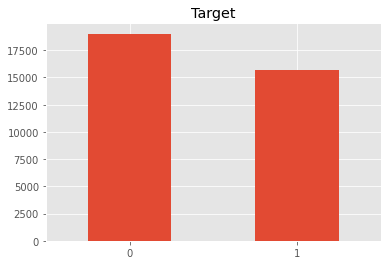

In [ ]:
# Count for Target Feature

plt.style.use('ggplot')
data['Target'].value_counts().plot.bar(title = 'Target', rot = 0)
display(data['Target'].value_counts())

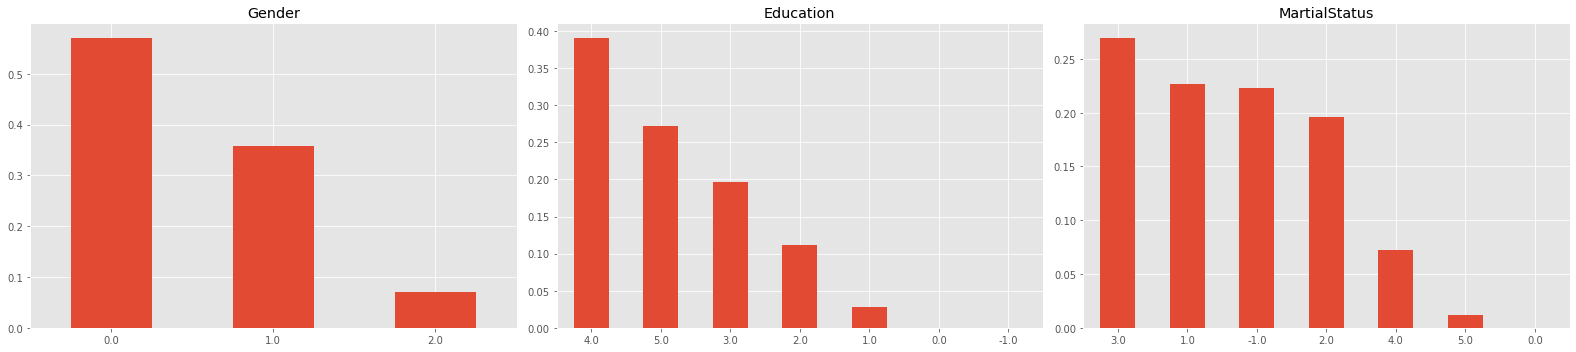

In [ ]:
# Count for Categorical Features

fig2, ax2 = plt.subplots(1, 3)
data['Gender'].value_counts(normalize = True).plot(figsize = (22, 5), ax = ax2[0], kind = 'bar', title = 'Gender', rot = 0)
data['Education'].value_counts(normalize = True).plot(ax = ax2[1], kind = 'bar', title = 'Education', rot = 0)
data['MaritalStatus'].value_counts(normalize = True).plot(ax = ax2[2], kind = 'bar', title = 'MartialStatus', rot = 0)
fig2.tight_layout()

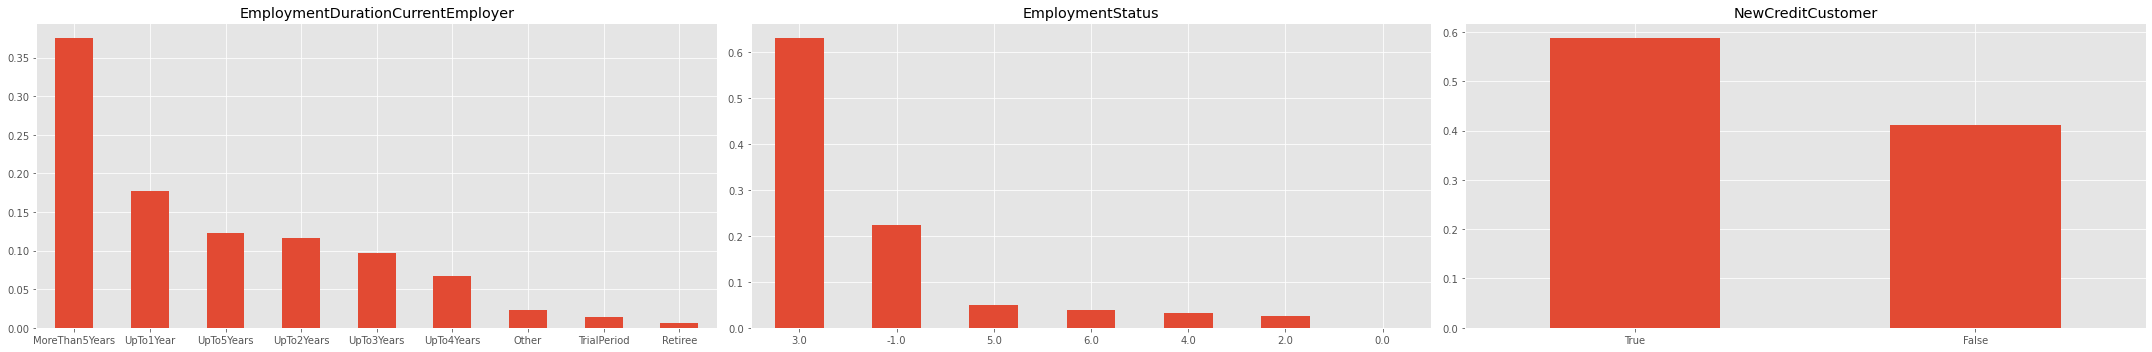

In [ ]:
fig2, ax2 = plt.subplots(1, 3)
data['EmploymentDurationCurrentEmployer'].value_counts(normalize = True).plot(figsize = (30, 5), ax = ax2[0], kind = 'bar', title = 'EmploymentDurationCurrentEmployer', rot = 0)
data['EmploymentStatus'].value_counts(normalize = True).plot(ax = ax2[1], kind = 'bar', title = 'EmploymentStatus', rot = 0)
data['NewCreditCustomer'].value_counts(normalize = True).plot(ax = ax2[2], kind = 'bar', title = 'NewCreditCustomer', rot = 0)
fig2.tight_layout()

In [ ]:
data.shape # While Exploring the Data We got 25 Useful Features

(34722, 25)

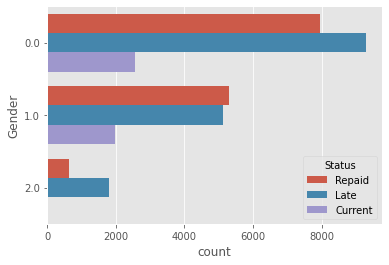

In [ ]:
# Gender vs Status

sns.countplot(y = 'Gender', hue = 'Status', data = data)

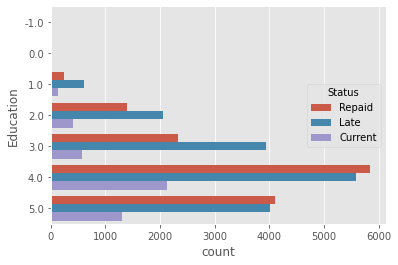

In [ ]:
# Education vs Status

sns.countplot(y = 'Education', hue = 'Status', data = data)

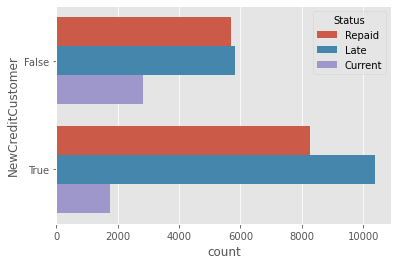

In [ ]:
# NewCreditCustomer vs Status

sns.countplot(y = 'NewCreditCustomer', hue = 'Status', data = data)

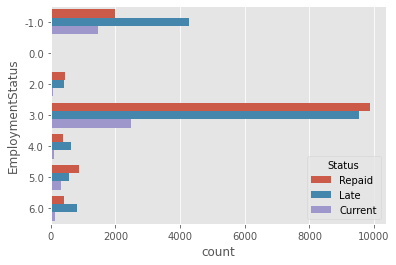

In [ ]:
# EmploymentStatus vs Status

sns.countplot(y = 'EmploymentStatus', hue = 'Status', data = data)

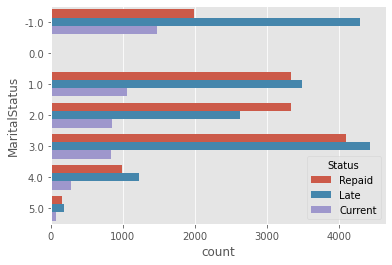

In [ ]:
# MaritialStatus vs Status

sns.countplot(y = 'MaritalStatus', hue = 'Status', data = data)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34722 entries, 0 to 34721
Data columns (total 25 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   LoanNumber                              34722 non-null  int64  
 1   NewCreditCustomer                       34722 non-null  bool   
 2   Age                                     34722 non-null  int64  
 3   Gender                                  34677 non-null  float64
 4   Amount                                  34722 non-null  float64
 5   Interest                                34722 non-null  float64
 6   LoanDuration                            34722 non-null  int64  
 7   UseOfLoan                               34722 non-null  int64  
 8   Education                               34677 non-null  float64
 9   MaritalStatus                           34677 non-null  float64
 10  EmploymentStatus                        34722 non-null  fl

######Encoding the Categorical Features

In [ ]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
cat = ['NewCreditCustomer', 'Status', 'Restructured', 'EmploymentDurationCurrentEmployer']
for var in cat:
  le = preprocessing.LabelEncoder()
  data[var] = le.fit_transform(data[var].astype('str'))

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34722 entries, 0 to 34721
Data columns (total 25 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   LoanNumber                              34722 non-null  int64  
 1   NewCreditCustomer                       34722 non-null  int64  
 2   Age                                     34722 non-null  int64  
 3   Gender                                  34677 non-null  float64
 4   Amount                                  34722 non-null  float64
 5   Interest                                34722 non-null  float64
 6   LoanDuration                            34722 non-null  int64  
 7   UseOfLoan                               34722 non-null  int64  
 8   Education                               34677 non-null  float64
 9   MaritalStatus                           34677 non-null  float64
 10  EmploymentStatus                        34722 non-null  fl

In [ ]:
data['NewCreditCustomer']

0        1
1        0
2        1
3        1
4        1
        ..
34717    1
34718    1
34719    1
34720    1
34721    1
Name: NewCreditCustomer, Length: 34722, dtype: int64

In [ ]:
data['Restructured']

0        0
1        0
2        1
3        0
4        0
        ..
34717    0
34718    0
34719    0
34720    0
34721    0
Name: Restructured, Length: 34722, dtype: int64

In [ ]:
data['EmploymentDurationCurrentEmployer']

0        6
1        0
2        7
3        5
4        5
        ..
34717    8
34718    0
34719    8
34720    2
34721    8
Name: EmploymentDurationCurrentEmployer, Length: 34722, dtype: int64

In [ ]:
data['EmploymentDurationCurrentEmployer'].value_counts()
data['EmploymentDurationCurrentEmployer'].isnull().sum()

0

In [ ]:
data['Status']

0        2
1        2
2        1
3        2
4        2
        ..
34717    0
34718    1
34719    2
34720    1
34721    1
Name: Status, Length: 34722, dtype: int64

In [ ]:
data['Status'].value_counts() 

1    16207
2    13948
0     4567
Name: Status, dtype: int64

######Finalizing Independant Features X to Predict Our Respective Y

In [ ]:
independant_features = ['NewCreditCustomer', 'Gender', 'Education', 'EmploymentStatus', 'Restructured']

for feature in independant_features:

  print(data[feature])
  print(data[feature].value_counts())

0        1
1        0
2        1
3        1
4        1
        ..
34717    1
34718    1
34719    1
34720    1
34721    1
Name: NewCreditCustomer, Length: 34722, dtype: int64
1    20411
0    14311
Name: NewCreditCustomer, dtype: int64
0        1.0
1        1.0
2        1.0
3        1.0
4        1.0
        ... 
34717    0.0
34718    0.0
34719    0.0
34720    0.0
34721    0.0
Name: Gender, Length: 34722, dtype: float64
0.0    19798
1.0    12418
2.0     2461
Name: Gender, dtype: int64
0        3.0
1        5.0
2        4.0
3        2.0
4        4.0
        ... 
34717    5.0
34718    4.0
34719    4.0
34720    3.0
34721    4.0
Name: Education, Length: 34722, dtype: float64
 4.0    13555
 5.0     9439
 3.0     6827
 2.0     3866
 1.0      980
 0.0        8
-1.0        2
Name: Education, dtype: int64
0        3.0
1        3.0
2        3.0
3        3.0
4        3.0
        ... 
34717   -1.0
34718   -1.0
34719   -1.0
34720   -1.0
34721   -1.0
Name: EmploymentStatus, Length: 34722, dtype: float6

In [ ]:
round(data.isnull().sum()/len(data.index), 2)*100

LoanNumber                                0.0
NewCreditCustomer                         0.0
Age                                       0.0
Gender                                    0.0
Amount                                    0.0
Interest                                  0.0
LoanDuration                              0.0
UseOfLoan                                 0.0
Education                                 0.0
MaritalStatus                             0.0
EmploymentStatus                          0.0
EmploymentDurationCurrentEmployer         0.0
IncomeTotal                               0.0
ExistingLiabilities                       0.0
LiabilitiesTotal                          0.0
RefinanceLiabilities                      0.0
Status                                    0.0
Restructured                              0.0
NoOfPreviousLoansBeforeLoan               0.0
AmountOfPreviousLoansBeforeLoan           0.0
PreviousRepaymentsBeforeLoan              0.0
PreviousEarlyRepaymentsCountBefore

In [ ]:
data.head(5)

,LoanNumber,NewCreditCustomer,Age,Gender,Amount,Interest,LoanDuration,UseOfLoan,Education,MaritalStatus,...,RefinanceLiabilities,Status,Restructured,NoOfPreviousLoansBeforeLoan,AmountOfPreviousLoansBeforeLoan,PreviousRepaymentsBeforeLoan,PreviousEarlyRepaymentsCountBeforeLoan,PrincipalDebtServicingCost,InterestAndPenaltyDebtServicingCost,Target
0,659,1,61,1.0,115.0408,30.0,12,7,3.0,1.0,...,0,2,0,1,83.0852,0.0000,0,0.0,0.0,1
1,654,0,48,1.0,140.6057,25.0,1,7,5.0,4.0,...,0,2,0,2,255.6467,258.6256,0,0.0,0.0,1
2,641,1,58,1.0,319.5409,25.0,20,2,4.0,1.0,...,0,1,1,0,0.0000,0.0000,0,0.0,0.0,0
3,668,1,23,1.0,57.5205,45.0,15,0,2.0,3.0,...,0,2,0,1,134.2144,0.0000,0,0.0,0.0,1
4,652,1,25,1.0,319.5436,30.0,12,6,4.0,2.0,...,0,2,0,1,146.9966,0.0000,0,0.0,0.0,0


Independant Features to Predict Risk

1. NewCreditCustomer - 1
2. Gender - 3
3. Education - 8
4. EmploymentStatus - 10
5. Restructured - 17

In [ ]:
columns = data.columns
columns.get_loc('Target')

24

In [ ]:
X = data.iloc[:, np.r_ [1, 3, 8, 10, 17]].values.astype('int')
Y = data.iloc[:, 24].values

In [ ]:
X

array([[ 1,  1,  3,  3,  0],
       [ 0,  1,  5,  3,  0],
       [ 1,  1,  4,  3,  1],
       ...,
       [ 1,  0,  4, -1,  0],
       [ 1,  0,  3, -1,  0],
       [ 1,  0,  4, -1,  0]])

In [ ]:
Y

array([1, 1, 0, ..., 1, 0, 0])

###### Splitting Data into Train and Test Set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

In [ ]:
X_train

array([[ 1,  1,  4, -1,  0],
       [ 1,  1,  4,  3,  0],
       [ 1,  1,  4,  6,  0],
       ...,
       [ 1,  0,  5,  3,  0],
       [ 0,  1,  4,  2,  0],
       [ 0,  1,  5,  3,  0]])

In [ ]:
Y_train

array([0, 1, 0, ..., 1, 1, 1])

###### Model Building

###### 1. Decision Tree 

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn import metrics

DTClassifier = DecisionTreeClassifier(criterion='entropy', random_state=0)
DTClassifier.fit(X_train, Y_train)
Y_pred = DTClassifier.predict(X_test)
Y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
print('The accuracy of the decision tree is: ', metrics.accuracy_score(Y_pred, Y_test))
print('Precision: {:.2f}'.format(precision_score(Y_test, Y_pred, average = 'weighted')))
print('Recall: {:.2f}'.format(recall_score(Y_test, Y_pred, average = 'weighted')))
print('F1-score: {:.2f}'.format(f1_score(Y_test, Y_pred, average = 'weighted')))

The accuracy of the decision tree is:  0.6242680234232505
Precision: 0.62
Recall: 0.62
F1-score: 0.62


###### 2. Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn import metrics

model = LogisticRegression()
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)
Y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
print('The accuracy of the Logistic Regression is: ', metrics.accuracy_score(Y_pred, Y_test))
print('Precision: {:.2f}'.format(precision_score(Y_test, Y_pred, average = 'weighted')))
print('Recall: {:.2f}'.format(recall_score(Y_test, Y_pred, average = 'weighted')))
print('F1-score: {:.2f}'.format(f1_score(Y_test, Y_pred, average = 'weighted')))

The accuracy of the Logistic Regression is:  0.5467985024479217
Precision: 0.49
Recall: 0.55
F1-score: 0.39


###### 3. Naive Bayes Performance

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn import metrics

NBClassifier = GaussianNB()
NBClassifier.fit(X_train, Y_train)
Y_pred = NBClassifier.predict(X_test)
Y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
print('The accuracy of the Naive Bayes is: ', metrics.accuracy_score(Y_pred, Y_test))
print('Precision: {:.2f}'.format(precision_score(Y_test, Y_pred, average = 'weighted')))
print('Recall: {:.2f}'.format(recall_score(Y_test, Y_pred, average = 'weighted')))
print('F1-score: {:.2f}'.format(f1_score(Y_test, Y_pred, average = 'weighted')))

The accuracy of the Naive Bayes is:  0.5467985024479217
Precision: 0.49
Recall: 0.55
F1-score: 0.39


##### The model is also evaluated across accuracy , precision , recall and F1 score.

- Accuracy is the total number of correct predictions made to determine if a loan would be default or non-default from the entire sample.
- Precision shows the actual number of non-default predictions out of all the all the values predicted as non-default.
- Recall shows the percentage of non-default predictions are correct over the total number of samples that should have been non-default.
- F1 Score is the harmonic mean between precision and recall.